<font size = 1 color="gray">Introducción a la computación numérica y simbólica con Python</font>  

<img src="img/logo-vector-u-tad.jpg" align="left" >

# 8. Cálculo simbólico

Con SymPy, podemos derivar, integrar o resolver ecuaciones diferenciales de forma analitica, de forma muy parecida a cómo lo hacemos con papel y lápiz, pero con la ventaja de que el ordenador nos ofrece la solución.

## Límites

SymPy ofrece la función `limit` para realizar esta operación. Empecemos por un caso sencillo.

$\lim_{x \to 1} \frac{x-1}{x+1}$

In [1]:
import numpy as np
import scipy as sci
import matplotlib.pyplot as plt
import sympy as sp
sp.init_printing()                                           # Esto es para que las expresiones se impriman bonitas

x, expresion = sp.symbols('x expresion')                        # Siempre hay que definir los símbolos antes de usarlos

expresion = (x-1)/(x+1)
sp.pprint(expresion)
limite_1 = sp.limit(expresion,x,1)
print()
print("El límite cuando tiende a 1 es",limite_1)

# También puede calcularse el límite cuando la varaible independiente tiende a infinito de la siguiente forma

limite_inf = sp.limit(expresion,x,sp.oo)
print("El límite cuando tiende a infinito es",limite_inf)

x - 1
─────
x + 1

El límite cuando tiende a 1 es 0
El límite cuando tiende a infinito es 1


Probemos con otro límite más complicado $\lim_{x \to 0} \frac{\sin(x)}{x}$, para el que sabemos que hay que aplicar la regla de L'Hôpital $\lim_{x \to 0} \frac{d\sin(x)/dx}{dx/dx} = \lim_{x \to 0} \cos(x) = 1$. SymPy lo hace por nosotros sin tener que especificarlo.

In [2]:
expresion = sp.sin(x)/x
sp.pprint(expresion)

limite_0 = sp.limit(expresion,x,0)
print()
print("El límite cuando tiende a 0 es ",limite_0)

sin(x)
──────
  x   

El límite cuando tiende a 0 es  1


Calcular los límites siguientes:
    
$\lim_{x \to \infty} (\frac{x+3}{x})^x$

$\lim_{x \to 5} { {2-\sqrt{x-1}}\over{x^2-25} }$

$\lim_{x \to \infty} x(\sqrt{x^2+1}-x)$

Primero lo hacemos analíticamente. 

$\lim_{x \to \infty} (\frac{x+3}{x})^x$. Es una indeterminación del tipo $1^\infty$. Tenemos que convertir la expresión en una variante de $\lim_{x \to \infty} (1+\frac{1}{x})^x = e$. Es sencillo, haciendo el cambio de variable $y = x/3$.

$\lim_{x \to \infty} (\frac{x+3}{x})^x = \lim_{x \to \infty} (1+\frac{1}{x/3})^x = \lim_{y \to \infty} (1+\frac{1}{y})^{3y} =(\lim_{y \to \infty} (1+\frac{1}{y})^{y})^3=e^3$.


$\lim_{x \to 5} { {2-\sqrt{x-1}}\over{x^2-25} }$ es una indeterminación $\frac{\infty}{\infty}$. Para resolverla, racionalizamos y simplificamos.

$\lim_{x \to 5} { {2-\sqrt{x-1}}\over{x^2-25} } = \lim_{x \to 5} { {(2-\sqrt{x-1})(2+\sqrt{x-1})}\over{(x^2-25)(2+\sqrt{x-1})}} =  \lim_{x \to 5} { {4-(x-1)}\over{(x-5)(x+5)(2+\sqrt{x-1})}} =  \lim_{x \to 5} {-1\over{(x+5)(2+\sqrt{x-1})}} = {-1\over(10\times 4)} = \frac{-1}{40}$


$\lim_{x \to \infty} x(\sqrt{x^2+1}-x)$ es un indeterminación de la forma $\infty\times(\infty-\infty)$. Multipicamos numerador y denominador por la expresión $\sqrt{x^2+1}+x$ y simplificamos.

$\lim_{x \to \infty} {{x(\sqrt{x^2+1}-x)(\sqrt{x^2+1}+x)}\over{\sqrt{x^2+1}+x}}$ = 
$\lim_{x \to \infty} {{x(x^2+1-x^2)}\over{\sqrt{x^2+1}+x}}$ =
$\lim_{x \to \infty} {{x}\over{\sqrt{x^2+1}+x}}$ = $\lim_{x \to \infty} {{1}\over{\sqrt{1+1/x^2}+1}} = \frac{1}{2}$

Ahora dejamos que SymPy lo haga por nosotros.

In [3]:
expresion = ((x+3)/x)**x
print(expresion)
limite_inf = sp.limit(expresion,x,sp.oo)
print("El límite cuando x tiende a infinito es ",limite_inf)

expresion = (2-sp.sqrt(x-1))/(x**2-25)
print(expresion)
limite_5 = sp.limit(expresion,x,5)
print("El límite cuando x tiende a infinito es ",limite_5)

expresion = x*(sp.sqrt(x**2+1)-x)
print(expresion)
limite_inf = sp.limit(expresion,x,sp.oo)
print("El límite cuando x tiende a infinito es ",limite_inf)

((x + 3)/x)**x
El límite cuando x tiende a infinito es  exp(3)
(2 - sqrt(x - 1))/(x**2 - 25)
El límite cuando x tiende a infinito es  -1/40
x*(-x + sqrt(x**2 + 1))
El límite cuando x tiende a infinito es  1/2


Si la función tiende a infinito, SymPy nos avisa.

$\lim_{x \to 0} \frac{1}{|x|}$

In [4]:
expresion = 1/sp.Abs(x)
sp.pprint(expresion)

limite_0 = sp.limit(expresion,x,0)
print()
print("El límite cuando x tiende a 0 es",limite_0)

 1 
───
│x│

El límite cuando x tiende a 0 es oo


Cuando los límites laterales son diferentes, SymPy devuelve por defecto el límite por la derecha.

$\lim_{x \to 0+} \frac{|x|}{x} = 1$

$\lim_{x \to 0-} \frac{|x|}{x} = -1$

In [5]:
expresion = sp.Abs(x)/x
sp.pprint(expresion)

limite_0 = sp.limit(expresion,x,0)
print()
print("El límite cuando x tiende a 0 es",limite_0)

limite_0plus = sp.limit(expresion,x,0,'+')
print("El límite cuando x tiende a 0 por la derecha es",limite_0plus)

limite_0minus = sp.limit(expresion,x,0,'-')
print("El límite cuando x tiende a 0 por la izquierda es",limite_0minus)

│x│
───
 x 

El límite cuando x tiende a 0 es 1
El límite cuando x tiende a 0 por la derecha es 1
El límite cuando x tiende a 0 por la izquierda es -1


## Derivación

Para derivar una expresión algebraica con SymPy basta aplicar la función `diff()` o el método del mismo nombre.

$\frac{d}{dt} (8t^2+3t+sin(2t)) = 16t^2+3+2cos(2t)$

In [6]:
t = sp.symbols('t')
expresion = 8*t**2+3*t+sp.sin(2*t)
sp.pprint(expresion)
print("df/dt = ",end = '')
deriv = sp.diff(expresion)
sp.pprint(deriv)
print("f'(0)=",(deriv.subs(t,0)).evalf(2))

   2                 
8⋅t  + 3⋅t + sin(2⋅t)
df/dt = 16⋅t + 2⋅cos(2⋅t) + 3
f'(0)= 5.0


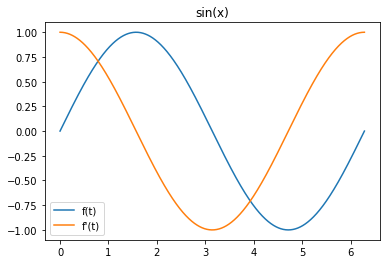

In [7]:
exprime, fprime = sp.symbols('exprime fprime')
t = np.linspace(0,2*np.pi,1000) 
expresionmat = sp.sin(x)
f = sp.lambdify(x, expresionmat, "numpy")  # Convierte la expresión simbólica a la funciones equivalentes de de NumPy
plt.plot(t,f(t),label="f(t)") 
exprime = sp.diff(expresionmat)
fprime = sp.lambdify(x, exprime, "numpy")
plt.title(expresionmat)
plt.plot(t,fprime(t),label="f'(t)")
plt.legend()

Podemos aplicar `diff` repetidas veces para calcular derivadas de orden superior.

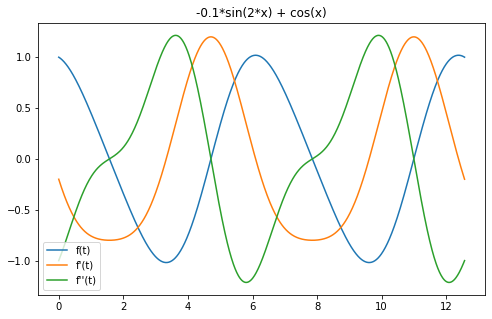

In [8]:
exprime2, fprime2 = sp.symbols('exprime2 fprime2')
t = np.linspace(0,4*np.pi,1000) 
expresionmat = sp.cos(x)-0.1*sp.sin(2*x)
f = sp.lambdify(x, expresionmat, "numpy")  # Convierte la expresión simbólica a la funciones equivalentes de de NumPy
plt.figure(figsize=(8,5))
plt.plot(t,f(t),label="f(t)") 
exprime = sp.diff(expresionmat)
fprime = sp.lambdify(x, exprime, "numpy")
plt.title(expresionmat)
plt.plot(t,fprime(t),label="f'(t)")
exprime2 = sp.diff(expresionmat,x,2)
fprime2 = sp.lambdify(x, exprime2, "numpy")
plt.plot(t,fprime2(t),label="f''(t)")
plt.legend()

SymPy dispone de la función `series` para obtener el desarrollo de Taylor.

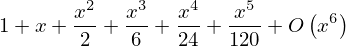

In [9]:
expr = sp.exp(x)
st = expr.series(x, 0, 6)
st

In [10]:
# Cálculo de la aproximación para x=1, es decir, e
aprox = st.removeO().subs(x, 1).evalf(8)
aprox

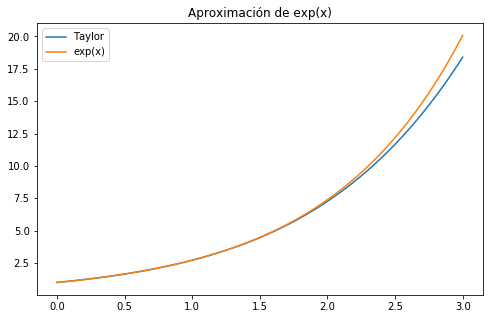

In [11]:
xx = np.linspace(0,3,100)
yy = []
for i in xx:
    expr = st.removeO()
    yy.append(expr.subs(x, i).evalf(8))
plt.figure(figsize=(8,5))
plt.title("Aproximación de exp(x)")
plt.plot(xx,yy,label="Taylor") 
plt.plot(xx,np.exp(xx),label="exp(x)")
plt.legend()

## Integración

Sympy dispode de la función `integrate` para calcular tanto integrales indefinidas como definidas.

$\int te^tdt$

In [12]:
t = sp.symbols('t')
integral = sp.symbols('integral')
expresion = t*sp.exp(t)
integral = sp.integrate(expresion, t)
print ("La integral indefinida de")
sp.pprint(expresion)
print ("es")
sp.pprint(integral)

La integral indefinida de
   t
t⋅ℯ 
es
         t
(t - 1)⋅ℯ 


El cálculo de una integral definida se hace de la misma manera indicando los límites de integración

$\int _{0}^{2}x^2dx$

In [13]:
expresion = x**2
sp.pprint(expresion)
print ("La integral entre 0 y 2 vale", sp.integrate(expresion, (x,0,2)))

 2
x 
La integral entre 0 y 2 vale 8/3


En la lección de integración numérica calculamos el volumen encerrado por la superficie $e^{\sqrt{x^2+y^2}}$ dentro del círculo de radio $1$ como $2\pi \int_{0}^{1}re^r dr = 2\pi (re^r - e^r) \Big|_0^1 = 2\pi$

In [14]:
# El mismo cálculo con SymPy
expresion = 2*sp.pi*t*sp.exp(t)
integral = sp.integrate(expresion, (t,0,1))
print ("El volumen entre el plano z=0 y la superficie")
sp.pprint(expresion)
print ("dentro del círculo de radio unidad es")
sp.pprint(integral)

El volumen entre el plano z=0 y la superficie
       t
2⋅π⋅t⋅ℯ 
dentro del círculo de radio unidad es
2⋅π


SymPy es capaz de integrar expresiones como la integral de Dirichlet de la función $sinc(x)$

$\int _{0}^{\infty}\frac{sin(x)}{x} dx$

In [15]:
expresion = sp.sin(x)/x
sp.pprint(expresion)
print ("La integral entre 0 e infinito vale", sp.integrate(expresion, (x,0,sp.oo)))

sin(x)
──────
  x   
La integral entre 0 e infinito vale pi/2


La siguiente integral muestra que SymPy es nivel superhéroe en cálculo.

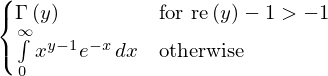

In [16]:
x, y= sp.symbols("x y")
sp.integrate(x**(y-1)*sp.exp(-x), (x, 0, sp.oo))

En efecto, $\Gamma(y) = \int_0^\infty x^{y-1} e^{-x}\,dx \,\!$. La función gamma fue definida por Adrien-Marie Legendre y si $n$ es un entero positivo se cumple que $\Gamma(n) = (n-1)!$

In [17]:
sp.gamma(8)

In [18]:
sci.math.factorial(7)

SymPy también permite calcular integrales múltiples, aunque en este curso de introducción solo hemos visto un ejemplo muy sencillo de cálculo de varias variables. Hallar el volumen definido por el triángulo definido por el eje $X$ entre $0$ y $1$, la recta $y=x$ y la superficie $f(x,y) = xy$.

$\int_{0}^{1}\int_{0}^{x}xydxdy  = \int_{0}^{1} x\frac{y^2}{2}\Big|_0^x =\int_{0}^{1} \frac{x^3}{2} = \frac{x^4}{8}\Big|_0^x = \frac{1}{8}$ 


In [19]:
from sympy import *

f = y*x
print("Integral entre x(0,1) con y=x de ",end='')
sp.pprint(f)
res = sp.integrate(f,  (y, 0, x), (x, 0, 1))
print(res)

Integral entre x(0,1) con y=x de x⋅y
1/8


## Ecuaciones diferenciales

Sympy también es capaz de resolver ecuaciones diferenciales de forma simbólica. Comenzamos por la ecuación que modela el proceso de disminución exponencial de una magnitud $x$ que ya vimos que es $\frac{dN(t)}{dt}=-kN$

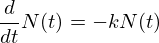

In [20]:
# Definición de la ecuación diferencial

k = sp.symbols('k')
N = sp.symbols('N', cls=sp.Function)
diffeq = sp.Eq(N(t).diff(t), -k*N(t))
diffeq

In [21]:
# Resolución de la ecuación

soln = sp.dsolve(diffeq,N(t))
soln

In [22]:
# Aplicación de las condiciones iniciales. Supongamos que N(0)= 1000

constantes = sp.solve([soln.rhs.subs(t,0) - 1000])
constantes


In [23]:
C1 = sp.symbols('C1')
soln = soln.subs(constantes)
soln

1000*exp(-0.1*t)


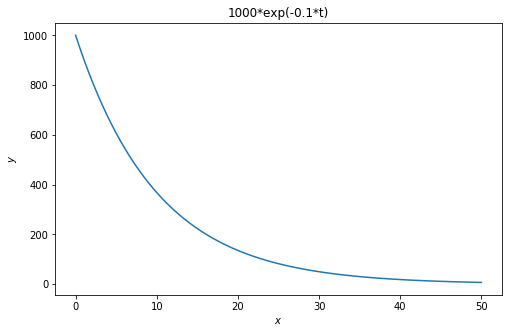

In [24]:
import math
soln = soln.subs(k,0.1)
print(soln.rhs)
func = sp.lambdify(t, soln.rhs, "math")  # Convierte la expresión simbólica a la funciones equivalentes de de NumPy
xpuntos = np.linspace(0,50,1000)
ypuntos = []
for i in xpuntos:
    ypuntos.append(func(i)) 
plt.figure(figsize=(8,5)) # tamaño de la gráfica en pulgadas
plt.plot(xpuntos,ypuntos)
plt.title(soln.rhs)
plt.xlabel('$x$') # título del eje horizontal
plt.ylabel('$y$') # título del eje  vertical
plt.show()

El procedimiento paso a paso es muy similar al que seguimos cuando resolvemos a mano este tipo de problemas. La resolución numérica de este mismo caso es mucho más rápida en tiempo y código.

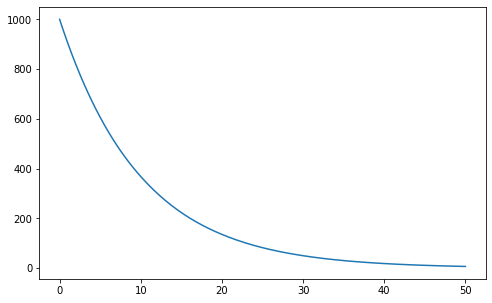

In [25]:
from scipy.integrate import solve_ivp
instantes = np.linspace(0, 50, 200)
sol = solve_ivp(lambda x,t:-0.1*t, (0, 200), np.array([1000]), t_eval = instantes )
plt.figure(figsize=(8,5)) # tamaño de la gráfica en pulgadas
plt.plot(sol.t, sol.y[0, :], '-')

Con SymPy también podemos resolver ecuaciones de grado superior, como la del oscilador amortiguado.

$\frac{d^2y}{dt^2}+ 3\frac{dy}{dt} + y = 0 ; y(0) = 1 ; y'(0) = 0$

In [26]:
y = sp.symbols('y',cls=sp.Function)
ysol = sp.dsolve(y(t).diff(t,t)+0.3*y(t).diff(t)+y(t),y(t))
ysol

In [27]:
C = sp.solve([ysol.rhs.subs(t,0)-1.0,ysol.rhs.diff(t).subs(t,0)-0.0])
C

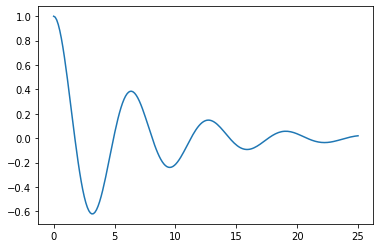

In [28]:
ysol = ysol.subs(C)
ysol = sp.lambdify(t,ysol.rhs,'numpy')
t = np.linspace(0,25,200)
plt.plot(t,ysol(t))

---

<font size="1" color="grey">
    (c) 2020 Javier García Algarra. <a href='https://www.u-tad.com'>www.u-tad.com</a> <br>
Licensed under a Creative Commons Reconocimiento 4.0 Internacional License
</font> 